
--- Scenario 1: No SRM, Actual Ratio (A/(A+B)): 0.5000 ---
Scenario 1: No SRM
                  Metric         Value
0      Conversion Rate A        0.0962
1      Conversion Rate B        0.1252
2   P-value (Chi-Square)        1.0000
3  Sample Ratio Mismatch  Not Detected


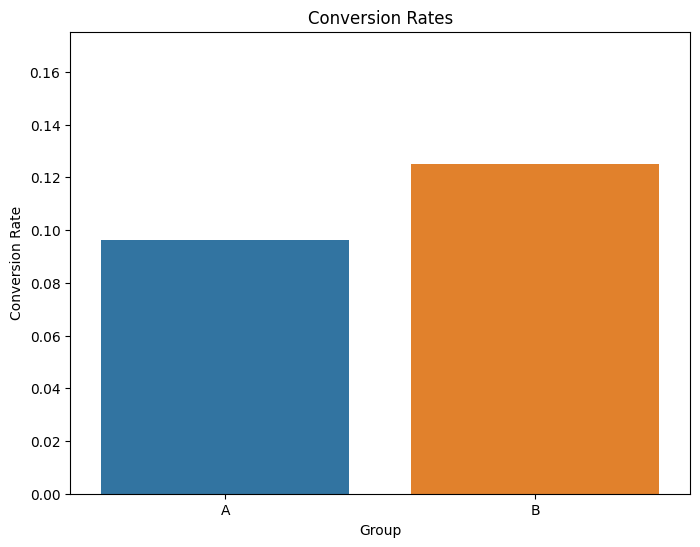

No significant Sample Ratio Mismatch detected.

--- Scenario 2: SRM, Group A Higher, Actual Ratio (A/(A+B)): 0.6000 ---
Scenario 2: SRM - Group A Higher
                  Metric     Value
0      Conversion Rate A    0.0995
1      Conversion Rate B    0.1187
2   P-value (Chi-Square)    0.0000
3  Sample Ratio Mismatch  Detected


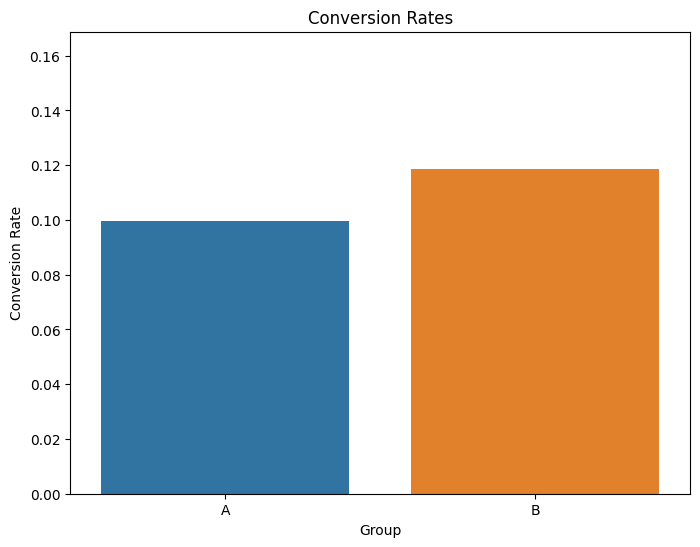

Sample Ratio Mismatch Detected!

--- Scenario 3: SRM, Group B Higher, Actual Ratio (A/(A+B)): 0.4000 ---
Scenario 3: SRM - Group B Higher
                  Metric     Value
0      Conversion Rate A    0.0980
1      Conversion Rate B    0.1217
2   P-value (Chi-Square)    0.0000
3  Sample Ratio Mismatch  Detected


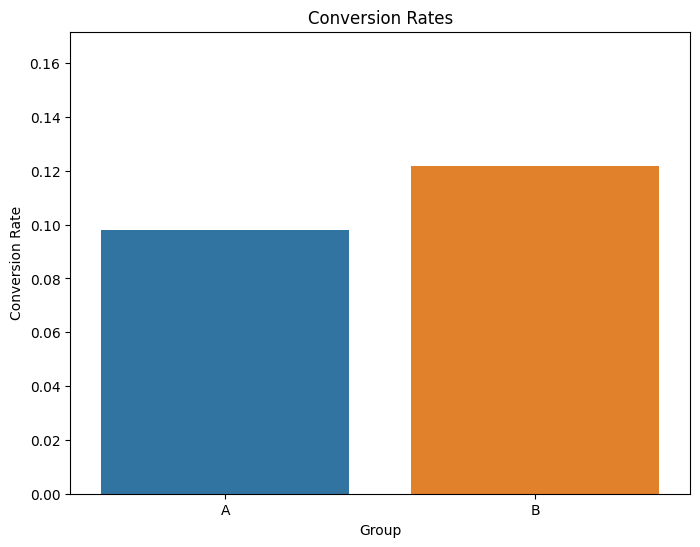

Sample Ratio Mismatch Detected!

--- Scenario 4: Unequal Conversion, SRM, Actual Ratio (A/(A+B)): 0.5000 ---
Scenario 4: Unequal Conversion and SRM
                  Metric         Value
0      Conversion Rate A        0.0994
1      Conversion Rate B        0.1472
2   P-value (Chi-Square)        1.0000
3  Sample Ratio Mismatch  Not Detected


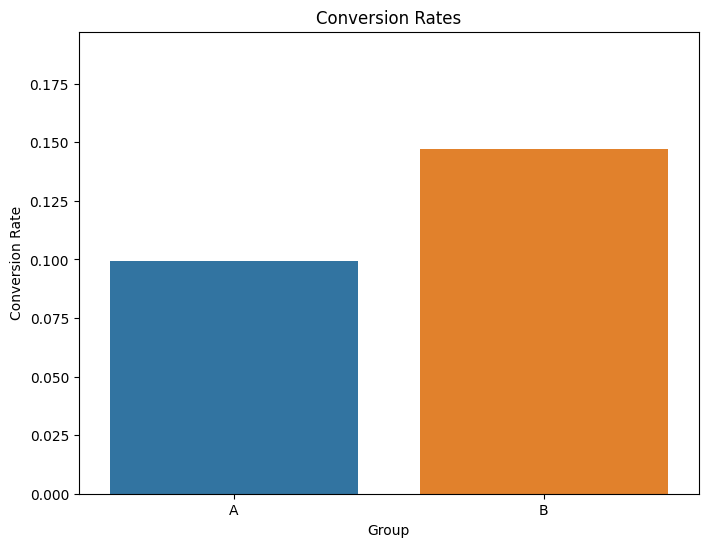

No significant Sample Ratio Mismatch detected.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate A/B testing data with a sample ratio mismatch
def simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='none'):
    """
    Simulates A/B testing data, potentially with a sample ratio mismatch.

    Args:
        total_users: The total number of users in the experiment.
        expected_ratio: The expected proportion of users in the control group (A).
        conversion_rate_A: The conversion rate for the control group (A).
        conversion_rate_B: The conversion rate for the test group (B).
        srm_type: Type of sample ratio mismatch ('none', 'A_higher', 'B_higher').

    Returns:
        A Pandas DataFrame with the simulated data, including a 'group' column ('A' or 'B')
        and a 'converted' column (True or False).  Also returns the actual ratio.
    """
    # Calculate the number of users in each group based on the expected ratio
    num_users_A = int(total_users * expected_ratio)
    num_users_B = total_users - num_users_A

    # Simulate group assignment, potentially with a mismatch
    if srm_type == 'A_higher':
        num_users_A = int(total_users * (expected_ratio + 0.1))  # Shift 10% to A
        num_users_B = total_users - num_users_A
    elif srm_type == 'B_higher':
        num_users_B = int(total_users * (1 - expected_ratio + 0.1))  # Shift 10% to B
        num_users_A = total_users - num_users_B

    group_A = ['A'] * num_users_A
    group_B = ['B'] * num_users_B
    group = group_A + group_B

    # Simulate conversions based on the given conversion rates
    converted_A = np.random.rand(num_users_A) < conversion_rate_A
    converted_B = np.random.rand(num_users_B) < conversion_rate_B
    converted = np.concatenate((converted_A, converted_B))

    # Create the DataFrame
    data = pd.DataFrame({'group': group, 'converted': converted})
    actual_ratio = num_users_A / total_users
    return data, actual_ratio

def analyze_ab_test(data, title="A/B Test Analysis"):
    """
    Analyzes A/B testing data to check for a significant difference in conversion rates
    and performs a Chi-Square test for sample ratio mismatch.  Also plots the results.

    Args:
        data: A Pandas DataFrame with 'group' and 'converted' columns.
        title: Title of the analysis
    Returns:
        Prints the conversion rates for each group, the p-value of the Chi-Square test,
        and a message indicating whether a sample ratio mismatch is detected.
        Also displays a bar chart of conversion rates and a table of the data.
    """
    # Calculate conversion rates for each group
    conversion_rate_A = data[data['group'] == 'A']['converted'].mean()
    conversion_rate_B = data[data['group'] == 'B']['converted'].mean()

    # Perform Chi-Square test for sample ratio mismatch
    observed_A = len(data[data['group'] == 'A'])
    observed_B = len(data[data['group'] == 'B'])
    total_users = len(data)
    expected_ratio = 0.5  # Assuming a 50/50 split for a standard A/B test
    expected_A = total_users * expected_ratio
    expected_B = total_users * (1 - expected_ratio)
    observed = np.array([observed_A, observed_B])
    expected = np.array([expected_A, expected_B])
    chi2, p_value = chisquare(observed, expected)

    alpha = 0.05  # Significance level

    # Create a table of the results
    results_table = pd.DataFrame({
        'Metric': ['Conversion Rate A', 'Conversion Rate B', 'P-value (Chi-Square)', 'Sample Ratio Mismatch'],
        'Value': [f"{conversion_rate_A:.4f}", f"{conversion_rate_B:.4f}", f"{p_value:.4f}", "Detected" if p_value < alpha else "Not Detected"]
    })
    print(title)
    print(results_table) # Print the table

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['A', 'B'], y=[conversion_rate_A, conversion_rate_B])
    plt.title('Conversion Rates')
    plt.xlabel('Group')
    plt.ylabel('Conversion Rate')
    plt.ylim(0, max(conversion_rate_A, conversion_rate_B) + 0.05)  # Add some padding to the y-axis
    plt.show()

    if p_value < alpha:
        print("Sample Ratio Mismatch Detected!")
    else:
        print("No significant Sample Ratio Mismatch detected.")
    return results_table # Return the table

# Example usage:
total_users = 10000
expected_ratio = 0.5  # Intended 50/50 split
conversion_rate_A = 0.10
conversion_rate_B = 0.12

# Scenario 1: No Sample Ratio Mismatch
data_no_srm, actual_ratio_no_srm = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='none')
print(f"\n--- Scenario 1: No SRM, Actual Ratio (A/(A+B)): {actual_ratio_no_srm:.4f} ---")
table_no_srm = analyze_ab_test(data_no_srm, title="Scenario 1: No SRM")


# Scenario 2: Sample Ratio Mismatch - Group A has higher proportion
data_A_higher, actual_ratio_A_higher = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='A_higher')
print(f"\n--- Scenario 2: SRM, Group A Higher, Actual Ratio (A/(A+B)): {actual_ratio_A_higher:.4f} ---")
table_a_higher = analyze_ab_test(data_A_higher, title="Scenario 2: SRM - Group A Higher")


# Scenario 3: Sample Ratio Mismatch - Group B has higher proportion
data_B_higher, actual_ratio_B_higher = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='B_higher')
print(f"\n--- Scenario 3: SRM, Group B Higher, Actual Ratio (A/(A+B)): {actual_ratio_B_higher:.4f} ---")
table_b_higher = analyze_ab_test(data_B_higher, title="Scenario 3: SRM - Group B Higher")

# Scenario 4: Unequal conversion rates and SRM
data_unequal_conv, actual_ratio_unequal_conv = simulate_ab_test(total_users, 0.4, 0.10, 0.15, srm_type='A_higher')
print(f"\n--- Scenario 4: Unequal Conversion, SRM, Actual Ratio (A/(A+B)): {actual_ratio_unequal_conv:.4f} ---")
table_unequal_conv = analyze_ab_test(data_unequal_conv, title="Scenario 4: Unequal Conversion and SRM")



--- Scenario 1: No SRM, Actual Ratio (A/(A+B)): 0.5000 ---

Scenario 1: No SRM
                       Metric         Value
0               Sample Size A          5000
1               Sample Size B          5000
2            Actual Ratio (A)        0.5000
3          Expected Ratio (A)        0.5000
4           Conversion Rate A        0.0992
5           Conversion Rate B        0.1240
6   Absolute Difference (B-A)        0.0248
7     Relative Difference (%)        25.00%
8      SRM Chi-Square p-value      1.000000
9       Sample Ratio Mismatch  Not Detected
10             T-test p-value      0.000082
11         Chi-Square p-value      0.000094
12       Fisher Exact p-value      0.000092
13   Statistical Significance   Significant


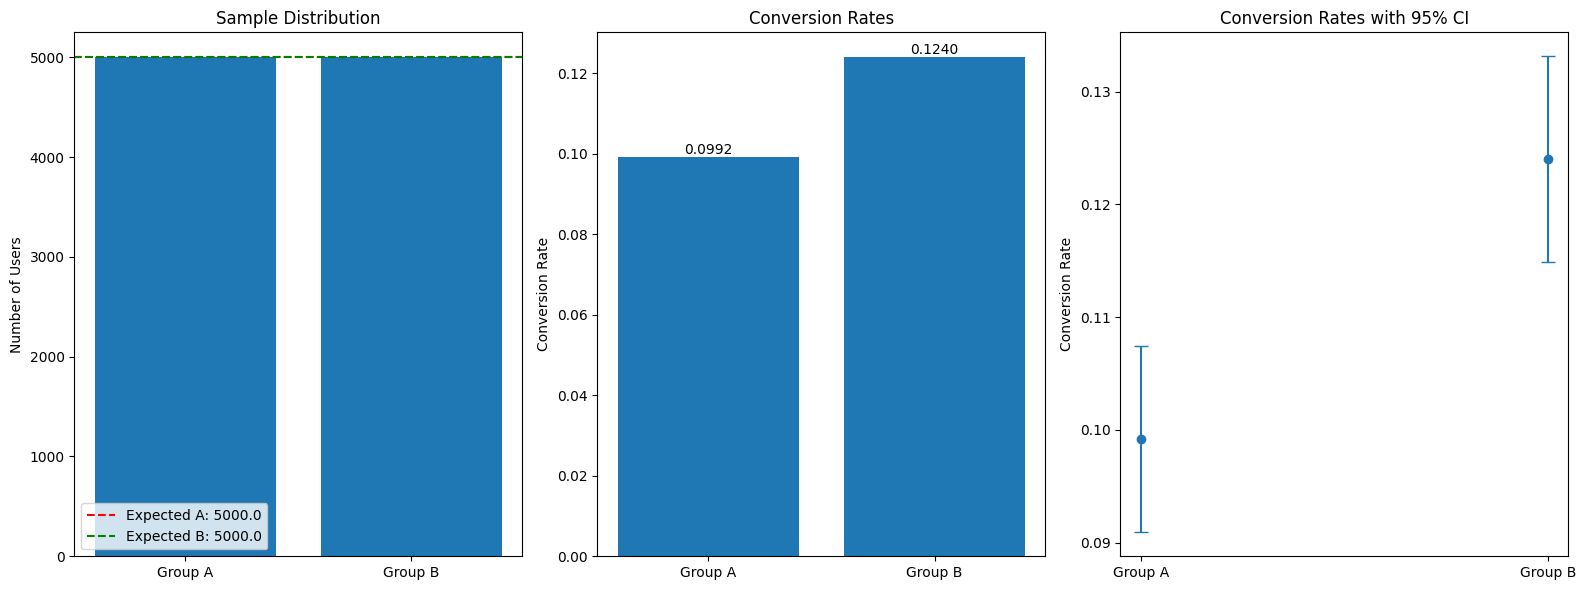


Analysis Summary:
✓ Statistically significant difference in conversion rates detected.
Group B performed better than Group A by 25.00%
Effect size (Cohen's h): 0.0789 (small)

--- Scenario 2: SRM, Group A Higher, Actual Ratio (A/(A+B)): 0.6000 ---

Scenario 2: SRM - Group A Higher
                       Metric        Value
0               Sample Size A         6000
1               Sample Size B         4000
2            Actual Ratio (A)       0.6000
3          Expected Ratio (A)       0.5000
4           Conversion Rate A       0.1028
5           Conversion Rate B       0.1210
6   Absolute Difference (B-A)       0.0182
7     Relative Difference (%)       17.67%
8      SRM Chi-Square p-value     0.000000
9       Sample Ratio Mismatch     Detected
10             T-test p-value     0.005059
11         Chi-Square p-value     0.004944
12       Fisher Exact p-value     0.005026
13   Statistical Significance  Significant


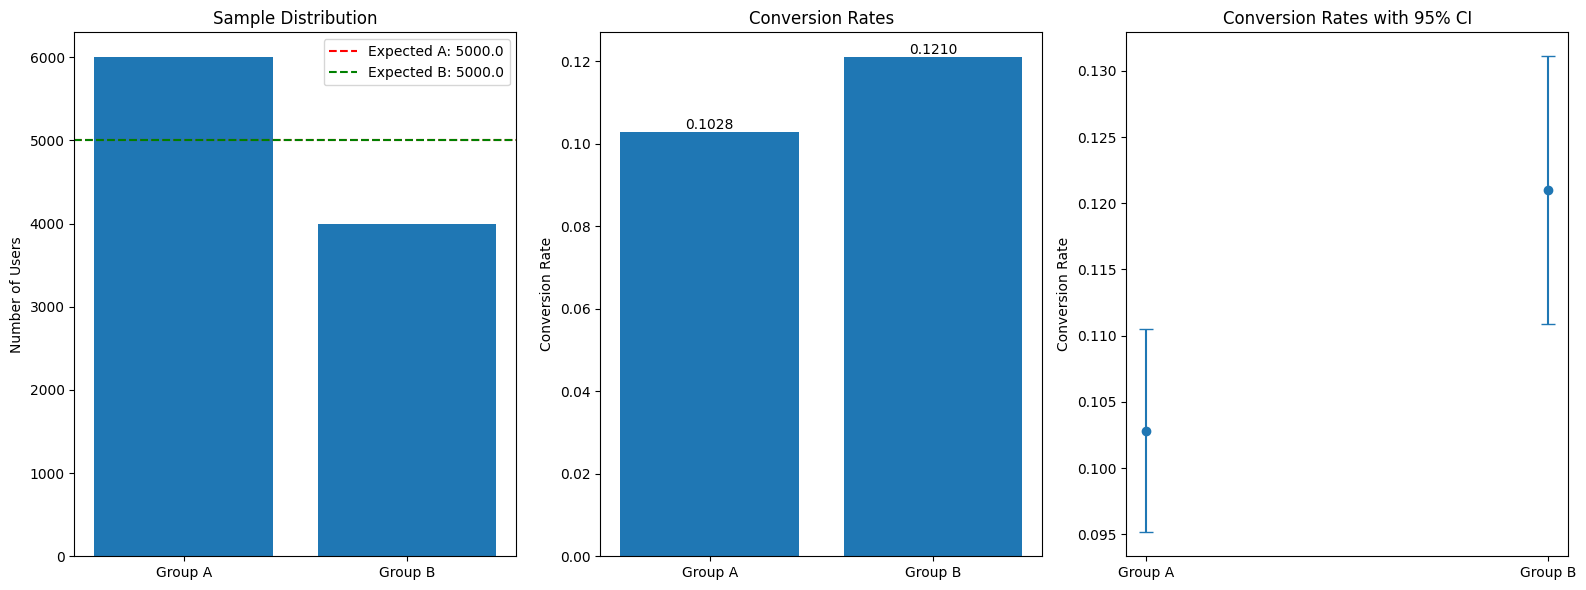


Analysis Summary:
⚠️ CAUTION: Sample Ratio Mismatch detected! This may indicate issues with experiment implementation.
Expected ratio: 0.50, Actual ratio: 0.60
Consider investigating the cause before drawing conclusions about conversion rates.
✓ Statistically significant difference in conversion rates detected.
Group B performed better than Group A by 17.67%
Effect size (Cohen's h): 0.0577 (small)

--- Scenario 3: SRM, Group B Higher, Actual Ratio (A/(A+B)): 0.4000 ---

Scenario 3: SRM - Group B Higher
                       Metric        Value
0               Sample Size A         4000
1               Sample Size B         6000
2            Actual Ratio (A)       0.4000
3          Expected Ratio (A)       0.5000
4           Conversion Rate A       0.1075
5           Conversion Rate B       0.1222
6   Absolute Difference (B-A)       0.0147
7     Relative Difference (%)       13.64%
8      SRM Chi-Square p-value     0.000000
9       Sample Ratio Mismatch     Detected
10             T-t

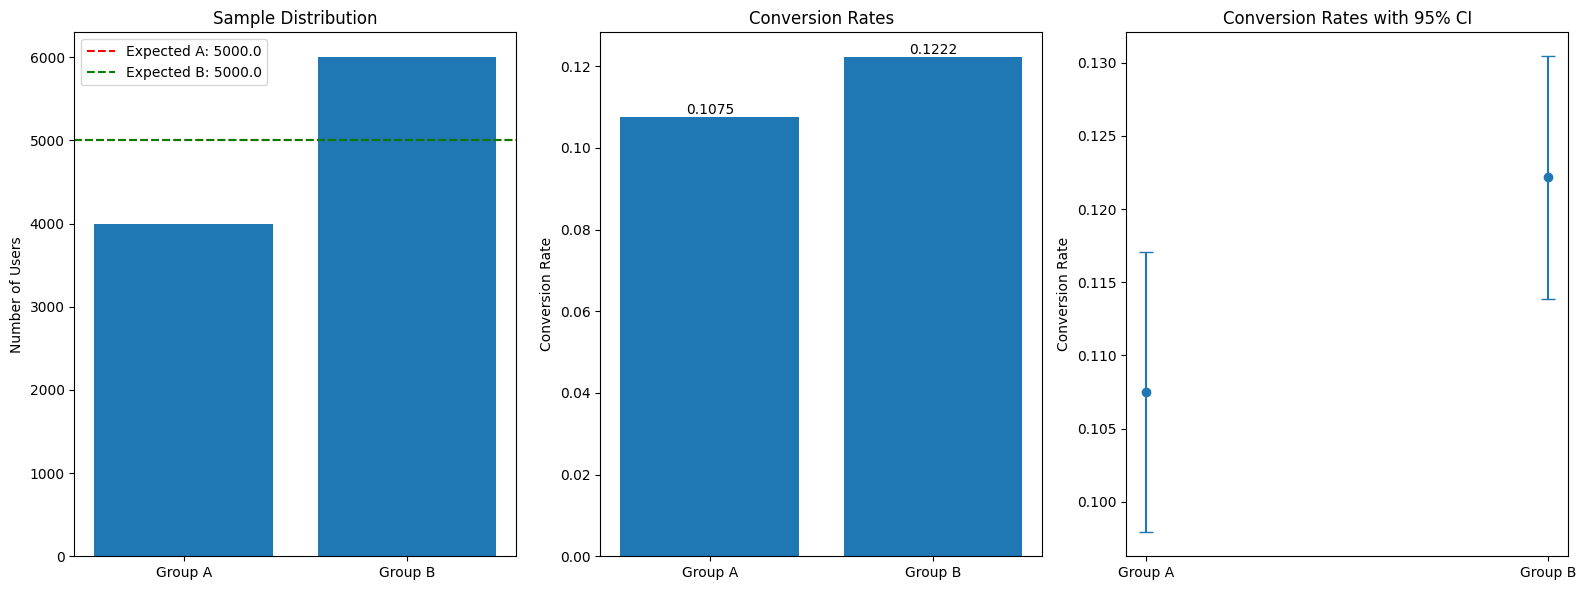


Analysis Summary:
⚠️ CAUTION: Sample Ratio Mismatch detected! This may indicate issues with experiment implementation.
Expected ratio: 0.50, Actual ratio: 0.40
Consider investigating the cause before drawing conclusions about conversion rates.
✓ Statistically significant difference in conversion rates detected.
Group B performed better than Group A by 13.64%
Effect size (Cohen's h): 0.0460 (small)

--- Scenario 4: Large Difference, No SRM, Actual Ratio (A/(A+B)): 0.5000 ---

Scenario 4: Large Difference (5%), No SRM
                       Metric         Value
0               Sample Size A          5000
1               Sample Size B          5000
2            Actual Ratio (A)        0.5000
3          Expected Ratio (A)        0.5000
4           Conversion Rate A        0.0992
5           Conversion Rate B        0.1454
6   Absolute Difference (B-A)        0.0462
7     Relative Difference (%)        46.57%
8      SRM Chi-Square p-value      1.000000
9       Sample Ratio Mismatch  Not De

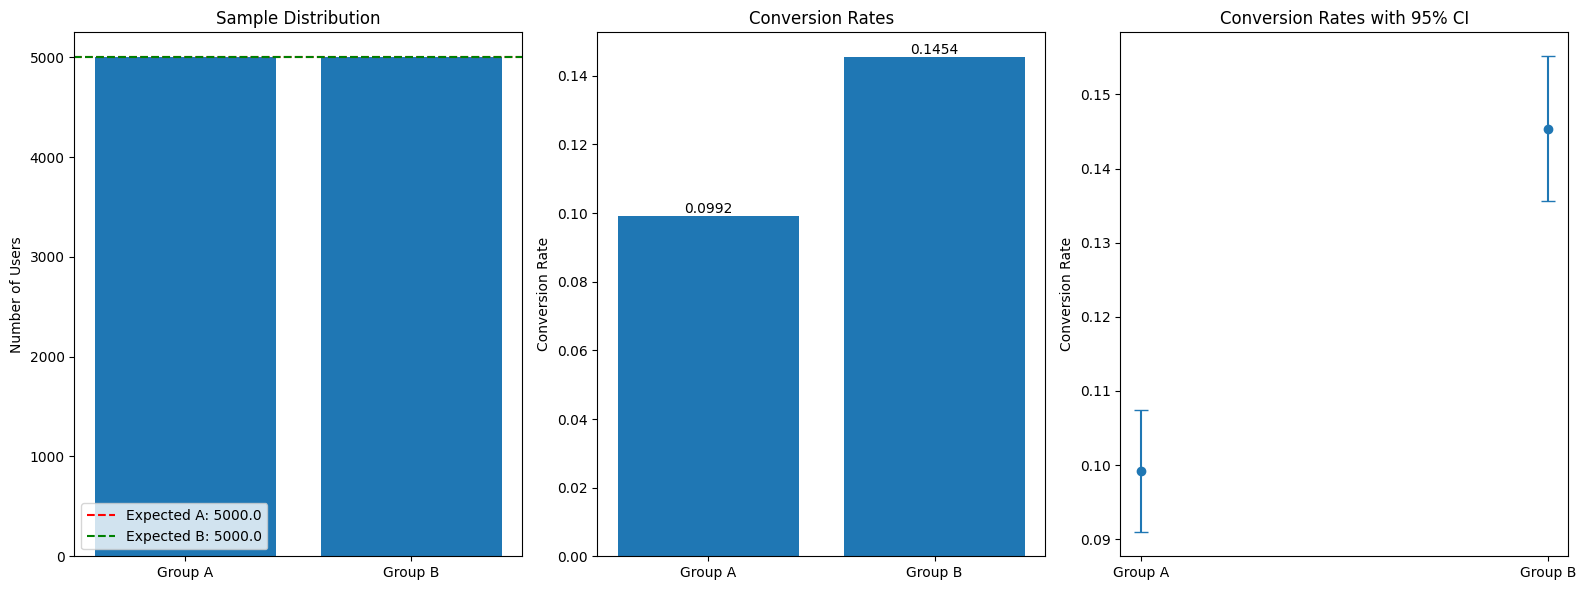


Analysis Summary:
✓ Statistically significant difference in conversion rates detected.
Group B performed better than Group A by 46.57%
Effect size (Cohen's h): 0.1416 (small)

--- Scenario 5: Small Difference, No SRM, Actual Ratio (A/(A+B)): 0.5000 ---

Scenario 5: Small Difference (0.5%), No SRM
                       Metric            Value
0               Sample Size A             5000
1               Sample Size B             5000
2            Actual Ratio (A)           0.5000
3          Expected Ratio (A)           0.5000
4           Conversion Rate A           0.1050
5           Conversion Rate B           0.1038
6   Absolute Difference (B-A)          -0.0012
7     Relative Difference (%)           -1.14%
8      SRM Chi-Square p-value         1.000000
9       Sample Ratio Mismatch     Not Detected
10             T-test p-value         0.844457
11         Chi-Square p-value         0.870111
12       Fisher Exact p-value         0.870119
13   Statistical Significance  Not Signific

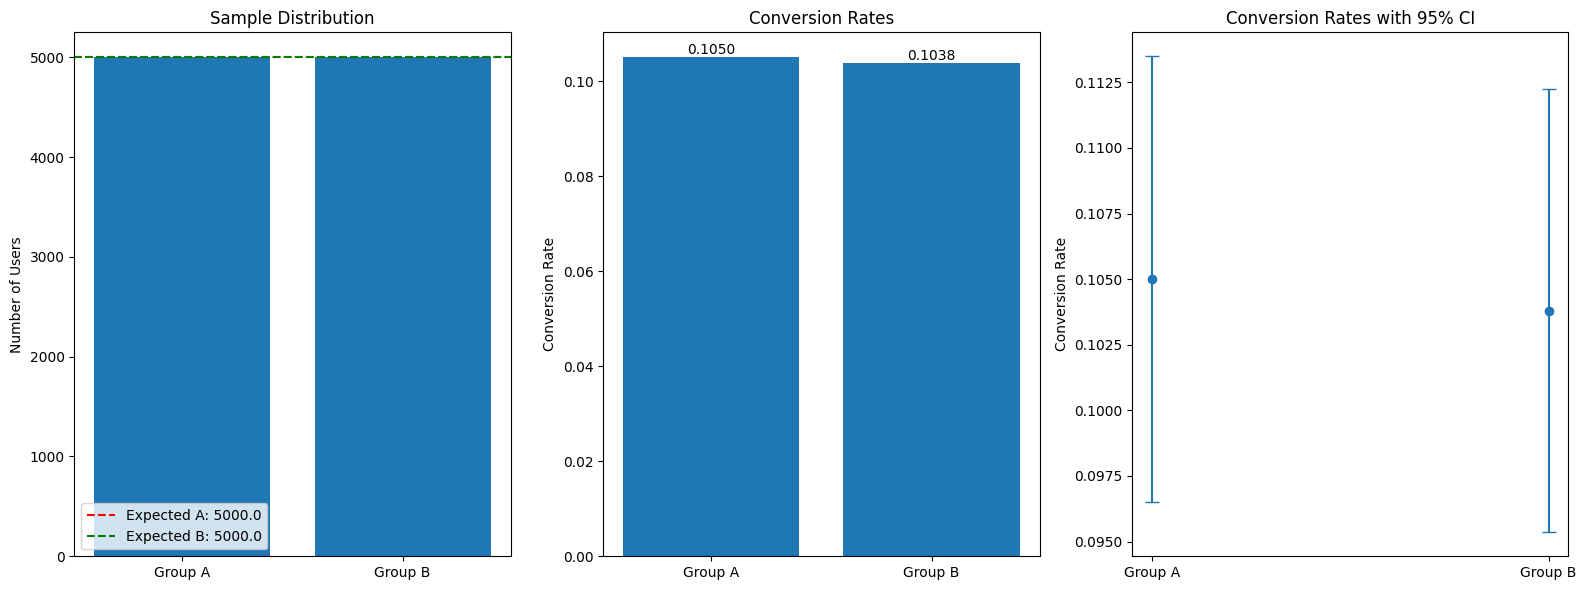


Analysis Summary:
✗ No statistically significant difference in conversion rates.
The observed difference of -0.0012 (1.14%) could be due to random chance.

--- Scenario 6: SRM and Large Difference, Actual Ratio (A/(A+B)): 0.6000 ---

Scenario 6: SRM + Large Difference
                       Metric        Value
0               Sample Size A         6000
1               Sample Size B         4000
2            Actual Ratio (A)       0.6000
3          Expected Ratio (A)       0.5000
4           Conversion Rate A       0.0988
5           Conversion Rate B       0.1417
6   Absolute Difference (B-A)       0.0429
7     Relative Difference (%)       43.42%
8      SRM Chi-Square p-value     0.000000
9       Sample Ratio Mismatch     Detected
10             T-test p-value     0.000000
11         Chi-Square p-value     0.000000
12       Fisher Exact p-value     0.000000
13   Statistical Significance  Significant


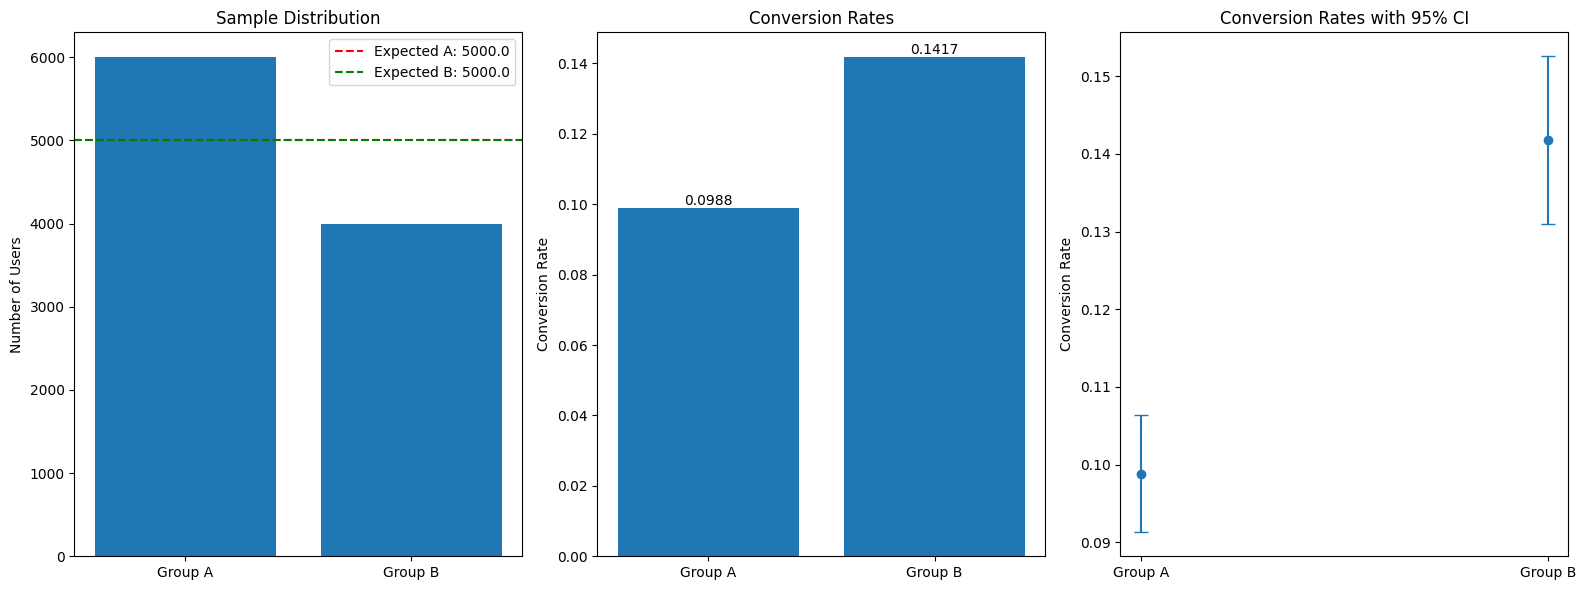


Analysis Summary:
⚠️ CAUTION: Sample Ratio Mismatch detected! This may indicate issues with experiment implementation.
Expected ratio: 0.50, Actual ratio: 0.60
Consider investigating the cause before drawing conclusions about conversion rates.
✓ Statistically significant difference in conversion rates detected.
Group B performed better than Group A by 43.42%
Effect size (Cohen's h): 0.1324 (small)

Scenario Comparison:
             Scenario  SRM Detected  Conversion A  Conversion B  \
0              No SRM         False      0.098600        0.1220   
1      SRM (A Higher)          True      0.098000        0.1240   
2      SRM (B Higher)          True      0.088500        0.1240   
3  Large Diff, No SRM         False      0.098200        0.1442   
4  Small Diff, No SRM         False      0.095800        0.1082   
5    SRM + Large Diff          True      0.100667        0.1525   

   Absolute Diff  Relative Diff (%)  T-test p-value  Significant  Effect Size  
0       0.023400          

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chisquare, ttest_ind, fisher_exact
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate A/B testing data with a sample ratio mismatch
def simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='none'):
    """
    Simulates A/B testing data, potentially with a sample ratio mismatch.

    Args:
        total_users: The total number of users in the experiment.
        expected_ratio: The expected proportion of users in the control group (A).
        conversion_rate_A: The conversion rate for the control group (A).
        conversion_rate_B: The conversion rate for the test group (B).
        srm_type: Type of sample ratio mismatch ('none', 'A_higher', 'B_higher').

    Returns:
        A Pandas DataFrame with the simulated data, including a 'group' column ('A' or 'B')
        and a 'converted' column (True or False). Also returns the actual ratio.
    """
    # Calculate the number of users in each group based on the expected ratio
    num_users_A = int(total_users * expected_ratio)
    num_users_B = total_users - num_users_A

    # Simulate group assignment, potentially with a mismatch
    if srm_type == 'A_higher':
        num_users_A = int(total_users * (expected_ratio + 0.1))  # Shift 10% to A
        num_users_B = total_users - num_users_A
    elif srm_type == 'B_higher':
        num_users_B = int(total_users * (1 - expected_ratio + 0.1))  # Shift 10% to B
        num_users_A = total_users - num_users_B

    group_A = ['A'] * num_users_A
    group_B = ['B'] * num_users_B
    group = group_A + group_B

    # Simulate conversions based on the given conversion rates
    converted_A = np.random.rand(num_users_A) < conversion_rate_A
    converted_B = np.random.rand(num_users_B) < conversion_rate_B
    converted = np.concatenate((converted_A, converted_B))

    # Create the DataFrame
    data = pd.DataFrame({'group': group, 'converted': converted})
    actual_ratio = num_users_A / total_users
    return data, actual_ratio

def analyze_ab_test_comprehensive(data, expected_ratio=0.5, title="A/B Test Analysis"):
    """
    Performs a comprehensive analysis of A/B testing data including:
    1. Sample ratio mismatch detection
    2. Conversion rate difference analysis
    3. Statistical significance testing using multiple methods
    4. Visualization of results
    
    Args:
        data: A Pandas DataFrame with 'group' and 'converted' columns.
        expected_ratio: The expected proportion of users in group A (default: 0.5)
        title: Title of the analysis
    
    Returns:
        A comprehensive results dictionary and displays visualizations
    """
    # Calculate basic metrics
    total_users = len(data)
    observed_A = len(data[data['group'] == 'A'])
    observed_B = len(data[data['group'] == 'B'])
    actual_ratio = observed_A / total_users
    
    # Calculate conversion metrics
    conv_A = data[data['group'] == 'A']['converted'].mean()
    conv_B = data[data['group'] == 'B']['converted'].mean()
    abs_difference = conv_B - conv_A
    rel_difference = abs_difference / conv_A * 100 if conv_A > 0 else np.nan
    
    # Counts for contingency table
    conversions_A = data[(data['group'] == 'A') & (data['converted'] == True)].shape[0]
    non_conversions_A = data[(data['group'] == 'A') & (data['converted'] == False)].shape[0]
    conversions_B = data[(data['group'] == 'B') & (data['converted'] == True)].shape[0]
    non_conversions_B = data[(data['group'] == 'B') & (data['converted'] == False)].shape[0]
    
    # 1. SRM Analysis
    expected_A = total_users * expected_ratio
    expected_B = total_users * (1 - expected_ratio)
    observed = np.array([observed_A, observed_B])
    expected = np.array([expected_A, expected_B])
    chi2_srm, p_value_srm = chisquare(observed, expected)
    srm_detected = p_value_srm < 0.05
    
    # 2. Conversion Rate Analysis - Multiple Statistical Tests
    
    # a. T-test for conversion rate difference
    A_conversions = data[data['group'] == 'A']['converted']
    B_conversions = data[data['group'] == 'B']['converted']
    t_stat, p_value_ttest = ttest_ind(A_conversions, B_conversions, equal_var=False)
    
    # b. Chi-square test for conversion rate difference
    contingency_table = np.array([[conversions_A, conversions_B], 
                                 [non_conversions_A, non_conversions_B]])
    chi2_conv, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)
    
    # c. Fisher exact test (good for smaller samples)
    _, p_value_fisher = fisher_exact(contingency_table)
    
    # Create a comprehensive results table
    results_table = pd.DataFrame({
        'Metric': [
            'Sample Size A', 'Sample Size B', 'Actual Ratio (A)', 'Expected Ratio (A)',
            'Conversion Rate A', 'Conversion Rate B', 
            'Absolute Difference (B-A)', 'Relative Difference (%)',
            'SRM Chi-Square p-value', 'Sample Ratio Mismatch',
            'T-test p-value', 'Chi-Square p-value', 'Fisher Exact p-value',
            'Statistical Significance'
        ],
        'Value': [
            f"{observed_A}", f"{observed_B}", f"{actual_ratio:.4f}", f"{expected_ratio:.4f}",
            f"{conv_A:.4f}", f"{conv_B:.4f}", 
            f"{abs_difference:.4f}", f"{rel_difference:.2f}%",
            f"{p_value_srm:.6f}", "Detected" if srm_detected else "Not Detected",
            f"{p_value_ttest:.6f}", f"{p_value_chi2:.6f}", f"{p_value_fisher:.6f}",
            "Significant" if (p_value_ttest < 0.05 or p_value_chi2 < 0.05) else "Not Significant"
        ]
    })
    
    # Print the title and results table
    print(f"\n{title}")
    print(results_table)
    
    # Create visualizations
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    
    # 1. Sample Distribution
    axes[0].bar(['Group A', 'Group B'], [observed_A, observed_B])
    axes[0].axhline(y=expected_A, color='r', linestyle='--', label=f'Expected A: {expected_A}')
    axes[0].axhline(y=expected_B, color='g', linestyle='--', label=f'Expected B: {expected_B}')
    axes[0].set_title('Sample Distribution')
    axes[0].set_ylabel('Number of Users')
    axes[0].legend()
    
    # 2. Conversion Rates
    axes[1].bar(['Group A', 'Group B'], [conv_A, conv_B])
    axes[1].set_title('Conversion Rates')
    axes[1].set_ylabel('Conversion Rate')
    axes[1].text(0, conv_A, f"{conv_A:.4f}", ha='center', va='bottom')
    axes[1].text(1, conv_B, f"{conv_B:.4f}", ha='center', va='bottom')
    
    # 3. Confidence Intervals for conversion difference
    from statsmodels.stats.proportion import proportion_confint, proportion_effectsize
    
    # Calculate effect size (Cohen's h)
    effect_size = proportion_effectsize(conv_B, conv_A)
    
    # Calculate confidence intervals
    ci_A_lower, ci_A_upper = proportion_confint(conversions_A, observed_A, alpha=0.05)
    ci_B_lower, ci_B_upper = proportion_confint(conversions_B, observed_B, alpha=0.05)
    
    # Plot
    axes[2].errorbar([0, 1], [conv_A, conv_B], 
                    yerr=[[conv_A - ci_A_lower, conv_B - ci_B_lower], 
                          [ci_A_upper - conv_A, ci_B_upper - conv_B]], 
                    fmt='o', capsize=5)
    axes[2].set_title('Conversion Rates with 95% CI')
    axes[2].set_xticks([0, 1])
    axes[2].set_xticklabels(['Group A', 'Group B'])
    axes[2].set_ylabel('Conversion Rate')
    
    plt.tight_layout()
    plt.show()
    
    # Create a detailed summary dictionary
    results_dict = {
        'title': title,
        'sample_sizes': {'A': observed_A, 'B': observed_B, 'total': total_users},
        'ratios': {'actual': actual_ratio, 'expected': expected_ratio},
        'srm': {'chi2': chi2_srm, 'p_value': p_value_srm, 'detected': srm_detected},
        'conversion_rates': {'A': conv_A, 'B': conv_B},
        'difference': {'absolute': abs_difference, 'relative': rel_difference},
        'statistical_tests': {
            'ttest': {'stat': t_stat, 'p_value': p_value_ttest},
            'chi2': {'stat': chi2_conv, 'p_value': p_value_chi2},
            'fisher': {'p_value': p_value_fisher}
        },
        'effect_size': effect_size,
        'confidence_intervals': {
            'A': [ci_A_lower, ci_A_upper],
            'B': [ci_B_lower, ci_B_upper]
        }
    }
    
    # Print recommendation based on results
    print("\nAnalysis Summary:")
    if srm_detected:
        print("⚠️ CAUTION: Sample Ratio Mismatch detected! This may indicate issues with experiment implementation.")
        print(f"Expected ratio: {expected_ratio:.2f}, Actual ratio: {actual_ratio:.2f}")
        print("Consider investigating the cause before drawing conclusions about conversion rates.")
    
    if p_value_ttest < 0.05 or p_value_chi2 < 0.05:
        print(f"✓ Statistically significant difference in conversion rates detected.")
        print(f"Group B performed {'better' if conv_B > conv_A else 'worse'} than Group A by {abs(rel_difference):.2f}%")
        
        if effect_size < 0.2:
            effect_magnitude = "small"
        elif effect_size < 0.5:
            effect_magnitude = "medium"
        else:
            effect_magnitude = "large"
        
        print(f"Effect size (Cohen's h): {effect_size:.4f} ({effect_magnitude})")
    else:
        print("✗ No statistically significant difference in conversion rates.")
        print(f"The observed difference of {abs_difference:.4f} ({abs(rel_difference):.2f}%) could be due to random chance.")
    
    return results_dict, results_table

# Example usage:
total_users = 10000
expected_ratio = 0.5  # Intended 50/50 split
conversion_rate_A = 0.10
conversion_rate_B = 0.12

# Scenario 1: No Sample Ratio Mismatch
data_no_srm, actual_ratio_no_srm = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='none')
print(f"\n--- Scenario 1: No SRM, Actual Ratio (A/(A+B)): {actual_ratio_no_srm:.4f} ---")
results_no_srm, table_no_srm = analyze_ab_test_comprehensive(data_no_srm, expected_ratio, title="Scenario 1: No SRM")

# Scenario 2: Sample Ratio Mismatch - Group A has higher proportion
data_A_higher, actual_ratio_A_higher = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='A_higher')
print(f"\n--- Scenario 2: SRM, Group A Higher, Actual Ratio (A/(A+B)): {actual_ratio_A_higher:.4f} ---")
results_A_higher, table_A_higher = analyze_ab_test_comprehensive(data_A_higher, expected_ratio, title="Scenario 2: SRM - Group A Higher")

# Scenario 3: Sample Ratio Mismatch - Group B has higher proportion
data_B_higher, actual_ratio_B_higher = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='B_higher')
print(f"\n--- Scenario 3: SRM, Group B Higher, Actual Ratio (A/(A+B)): {actual_ratio_B_higher:.4f} ---")
results_B_higher, table_B_higher = analyze_ab_test_comprehensive(data_B_higher, expected_ratio, title="Scenario 3: SRM - Group B Higher")

# Scenario 4: Unequal conversion rates with large difference
data_large_diff, actual_ratio_large_diff = simulate_ab_test(total_users, expected_ratio, 0.10, 0.15, srm_type='none')
print(f"\n--- Scenario 4: Large Difference, No SRM, Actual Ratio (A/(A+B)): {actual_ratio_large_diff:.4f} ---")
results_large_diff, table_large_diff = analyze_ab_test_comprehensive(data_large_diff, expected_ratio, title="Scenario 4: Large Difference (5%), No SRM")

# Scenario 5: Unequal conversion rates with small difference
data_small_diff, actual_ratio_small_diff = simulate_ab_test(total_users, expected_ratio, 0.10, 0.105, srm_type='none')
print(f"\n--- Scenario 5: Small Difference, No SRM, Actual Ratio (A/(A+B)): {actual_ratio_small_diff:.4f} ---")
results_small_diff, table_small_diff = analyze_ab_test_comprehensive(data_small_diff, expected_ratio, title="Scenario 5: Small Difference (0.5%), No SRM")

# Scenario 6: Combination of SRM and large difference
data_combo, actual_ratio_combo = simulate_ab_test(total_users, expected_ratio, 0.10, 0.15, srm_type='A_higher')
print(f"\n--- Scenario 6: SRM and Large Difference, Actual Ratio (A/(A+B)): {actual_ratio_combo:.4f} ---")
results_combo, table_combo = analyze_ab_test_comprehensive(data_combo, expected_ratio, title="Scenario 6: SRM + Large Difference")

# Additional function to compare all scenarios
def compare_all_scenarios(results_list, titles):
    """Compares key metrics across all scenarios"""
    comparison = pd.DataFrame({
        'Scenario': titles,
        'SRM Detected': [r['srm']['detected'] for r in results_list],
        'Conversion A': [r['conversion_rates']['A'] for r in results_list],
        'Conversion B': [r['conversion_rates']['B'] for r in results_list],
        'Absolute Diff': [r['difference']['absolute'] for r in results_list],
        'Relative Diff (%)': [r['difference']['relative'] for r in results_list],
        'T-test p-value': [r['statistical_tests']['ttest']['p_value'] for r in results_list],
        'Significant': [r['statistical_tests']['ttest']['p_value'] < 0.05 for r in results_list],
        'Effect Size': [r['effect_size'] for r in results_list]
    })
    
    # Create a comparison visualization
    plt.figure(figsize=(14, 8))
    
    # Plot relative differences
    plt.subplot(2, 1, 1)
    bars = plt.bar(comparison['Scenario'], comparison['Relative Diff (%)'])
    
    # Color bars based on significance
    for i, (bar, is_sig) in enumerate(zip(bars, comparison['Significant'])):
        bar.set_color('green' if is_sig else 'gray')
        
    plt.ylabel('Relative Difference (%)')
    plt.title('Comparison of Treatment Effects Across Scenarios')
    plt.xticks(rotation=45, ha='right')
    
    # Add SRM indicators
    for i, (x, srm) in enumerate(zip(range(len(comparison)), comparison['SRM Detected'])):
        if srm:
            plt.text(x, comparison['Relative Diff (%)'].iloc[i] + 1, "SRM", 
                    color='red', ha='center', fontweight='bold')
    
    # Plot p-values
    plt.subplot(2, 1, 2)
    plt.bar(comparison['Scenario'], comparison['T-test p-value'])
    plt.axhline(y=0.05, color='r', linestyle='--', label='α = 0.05')
    plt.ylabel('P-value')
    plt.title('Statistical Significance Across Scenarios')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Compare all scenarios
all_results = [results_no_srm, results_A_higher, results_B_higher, 
              results_large_diff, results_small_diff, results_combo]
all_titles = ["No SRM", "SRM (A Higher)", "SRM (B Higher)", 
             "Large Diff, No SRM", "Small Diff, No SRM", "SRM + Large Diff"]

# comparison_table = compare_all_scenarios(all_results, all_titles)
print("\nScenario Comparison:")
print(comparison_table)